In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
dane = pd.read_csv('../DataIn/004_mieszkania.csv')
X = dane.iloc[:, :1].values 
y = dane.iloc[:, -1].values
y_r = y.reshape(-1, 1) 

In [3]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_norm = X_scaler.fit_transform(X)
y_norm = y_scaler.fit_transform(y_r)

In [4]:
model_linear = SVR(kernel='linear', tol=0.001, C=100.0, epsilon=0.1)
model_linear.fit(X_norm, y_norm.ravel())
model_poly = SVR(kernel='poly', degree=4, gamma='scale', coef0=0.0, tol=0.001, C=100.0, epsilon=0.1)
model_poly.fit(X_norm, y_norm.ravel()) 
model_rbf = SVR(kernel='rbf', gamma='scale', tol=0.001, C=100.0, epsilon=0.1)
model_rbf.fit(X_norm, y_norm.ravel())
model_sigmoid = SVR(kernel='sigmoid', gamma='scale', coef0=0.0, tol=0.001, C=0.1, epsilon=0.1)
model_sigmoid.fit(X_norm, y_norm.ravel())
pass

In [5]:
X_in = np.linspace(np.min(X), np.max(X), int((np.max(X)-np.min(X))/2)) 
X_in = X_in.reshape(-1, 1)
X_norm = X_scaler.transform(X_in) 
prognoza_norm_linear = model_linear.predict(X_norm)
prognoza_norm_linear = prognoza_norm_linear.reshape(-1,1) 
prognoza_linear = y_scaler.inverse_transform(prognoza_norm_linear) 
prognoza_norm_poly = model_poly.predict(X_norm)
prognoza_norm_poly = prognoza_norm_poly.reshape(-1,1)
prognoza_poly = y_scaler.inverse_transform(prognoza_norm_poly) 
prognoza_norm_rbf = model_rbf.predict(X_norm)
prognoza_norm_rbf = prognoza_norm_rbf.reshape(-1,1)
prognoza_rbf = y_scaler.inverse_transform(prognoza_norm_rbf) 
prognoza_norm_sigmoid = model_sigmoid.predict(X_norm)
prognoza_norm_sigmoid = prognoza_norm_sigmoid.reshape(-1,1)
prognoza_sigmoid = y_scaler.inverse_transform(prognoza_norm_sigmoid) 

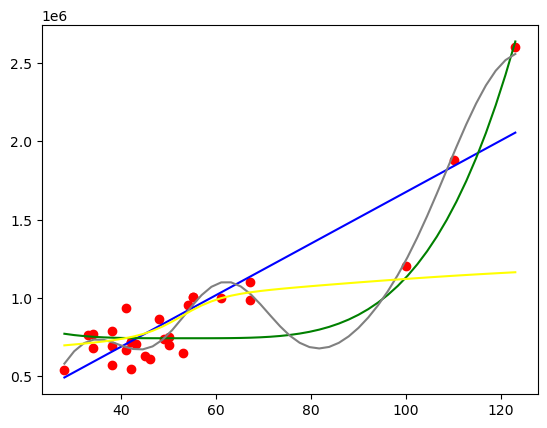

In [6]:
plt.scatter(X, y, color='red')
plt.plot(X_in, prognoza_linear, color='blue') 
plt.plot(X_in, prognoza_poly, color='green') 
plt.plot(X_in, prognoza_rbf, color='grey') 
plt.plot(X_in, prognoza_sigmoid, color='yellow') 
plt.show()